In [2]:
import pandas as pd # data processing 
import numpy as np # linear algebra 


# plotting libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

# ML libraries 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

# ML models 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 

# for UI 
import ipywidgets as widgets 
from IPython.display import display 

## Load CSV File 

In [3]:
# load mortgage data from a csv file for training
training = 'Desktop/trainData.csv'
train_df = pd.read_csv(training)

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            999 non-null    object 
 1   Gender             980 non-null    object 
 2   Married            994 non-null    object 
 3   Dependents         973 non-null    float64
 4   Education          999 non-null    object 
 5   Self_Employed      946 non-null    object 
 6   ApplicantIncome    999 non-null    int64  
 7   CoapplicantIncome  999 non-null    float64
 8   LoanAmount         963 non-null    float64
 9   Loan_Amount_Term   973 non-null    float64
 10  Credit_History     919 non-null    float64
 11  Property_Area      999 non-null    object 
 12  Loan_Status        999 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.6+ KB


# Cleaning Data 

In [6]:
del train_df['Loan_ID']


In [7]:
# variables to start cleaning data for test_df
gender_missing = train_df['Gender'].isnull()
married_missing = train_df['Married'].isnull()
dependents_missing = train_df['Dependents'].isnull()
employed_missing = train_df['Self_Employed'].isnull()
loan_missing = train_df['LoanAmount'].isnull()
term_missing = train_df['Loan_Amount_Term'].isnull()
credit_missing = train_df['Credit_History'].isnull()



In [8]:
# Check value counts of each column 
train_df['Gender'].value_counts()

Male      798
Female    182
Name: Gender, dtype: int64

In [9]:
train_df['Married'].value_counts()

Yes    648
No     346
Name: Married, dtype: int64

In [10]:
train_df['Dependents'].value_counts()

0.0    567
1.0    164
2.0    159
3.0     83
Name: Dependents, dtype: int64

In [11]:
train_df['Self_Employed'].value_counts()

No     815
Yes    131
Name: Self_Employed, dtype: int64

In [12]:
train_df['LoanAmount'].value_counts()

120.0    38
110.0    23
100.0    23
187.0    19
160.0    19
         ..
246.0     1
500.0     1
119.0     1
209.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [13]:
train_df['Loan_Amount_Term'].value_counts()

360.0    830
180.0     71
480.0     27
300.0     20
120.0      6
240.0      6
84.0       5
60.0       4
36.0       3
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
train_df['Credit_History'].value_counts()

1.0    781
0.0    138
Name: Credit_History, dtype: int64

In [15]:
# Fill in missing values with the max amount of each value, except loan amount 
train_df.loc[gender_missing, 'Gender'] = 'Male' # Male is prominent 
train_df.loc[married_missing, 'Married'] = 'Yes' # Married is prominent 
train_df.loc[dependents_missing, 'Dependents'] = 0.0 # 0 dependents is prominent 
train_df.loc[employed_missing, 'Self_Employed'] = 'No' # Most people are employed with someoine else 
train_df.loc[term_missing, 'Loan_Amount_Term'] = 360 # Most terms are 360 months 
train_df.loc[credit_missing, 'Credit_History'] = 1.0 # most common value 

In [16]:
# Find average of loan amounts based off current information 
train_df['LoanAmount'].sum()

141001.0

In [17]:
train_df['LoanAmount'].isnull().sum()

36

In [18]:
train_to_divide = 999 - 36

In [19]:
average = 141001.0 / train_to_divide
average

146.4184839044652

In [20]:
# fill in missing value with 146.0
train_df.loc[loan_missing, 'LoanAmount'] = 146.0

In [21]:
# no null values 
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             999 non-null    object 
 1   Married            999 non-null    object 
 2   Dependents         999 non-null    float64
 3   Education          999 non-null    object 
 4   Self_Employed      999 non-null    object 
 5   ApplicantIncome    999 non-null    int64  
 6   CoapplicantIncome  999 non-null    float64
 7   LoanAmount         999 non-null    float64
 8   Loan_Amount_Term   999 non-null    float64
 9   Credit_History     999 non-null    float64
 10  Property_Area      999 non-null    object 
 11  Loan_Status        999 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 93.8+ KB


In [22]:
# Changing the column names for cleaner look for graphs below 
train_df = train_df.rename(columns = {'ApplicantIncome' : 'Applicant_Income',
                         'CoapplicantIncome' : 'Co_Applicant_Income',
                         'LoanAmount': 'Loan_Amount'})

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               999 non-null    object 
 1   Married              999 non-null    object 
 2   Dependents           999 non-null    float64
 3   Education            999 non-null    object 
 4   Self_Employed        999 non-null    object 
 5   Applicant_Income     999 non-null    int64  
 6   Co_Applicant_Income  999 non-null    float64
 7   Loan_Amount          999 non-null    float64
 8   Loan_Amount_Term     999 non-null    float64
 9   Credit_History       999 non-null    float64
 10  Property_Area        999 non-null    object 
 11  Loan_Status          999 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 93.8+ KB


## Dashboard

In [24]:
%matplotlib inline 
import seaborn as sns

from ipywidgets import interact
@interact(hue=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Co_Applicant_Income',
              'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
def plot(hue):
    _ = sns.pairplot(train_df, hue=hue)

interactive(children=(Dropdown(description='hue', options=('Gender', 'Married', 'Dependents', 'Education', 'Se…

## Graph Data 

In [252]:
# separate numerical and categorial data 

numbers = train_df.select_dtypes('number').columns.to_list()
categories = train_df.select_dtypes('object').columns.to_list()

# numeric df 
loan_n = train_df[numbers]

#categoric df 
loan_c = train_df[categories]

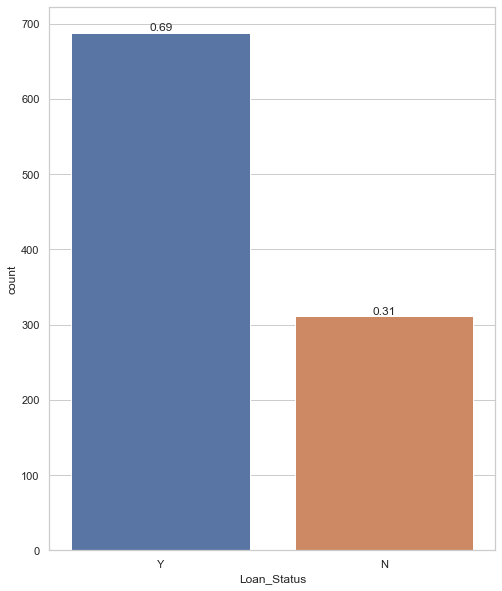

In [253]:
# graphs the amount of yes and no approval 
total = float(len(train_df[categories[-1]]))
plt.figure(figsize=(8,10))
sns.set(style='whitegrid')
ax = sns.countplot(x = train_df['Loan_Status'])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha='center')
plt.show() 

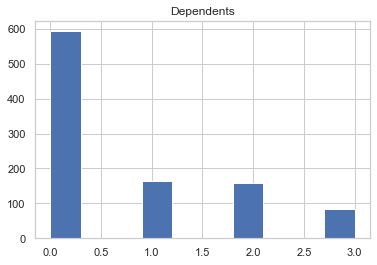

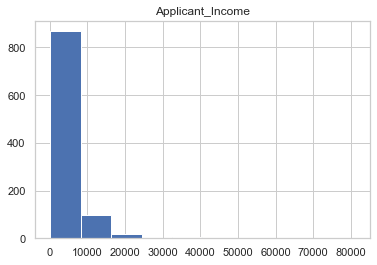

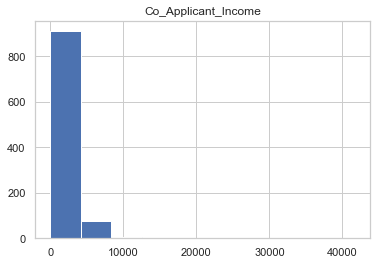

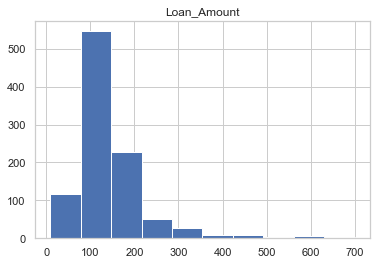

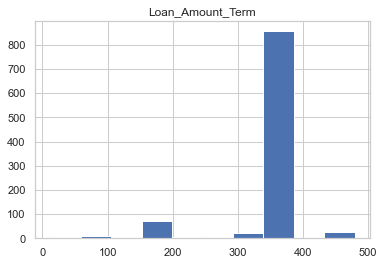

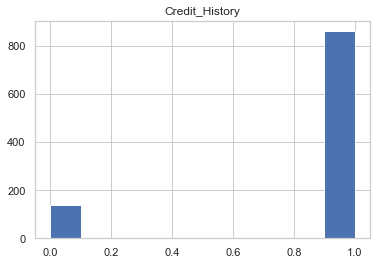

In [254]:
# graphs all information for numerical data 
for i in loan_n:
    plt.hist(loan_n[i])
    plt.title(i)
    plt.show()

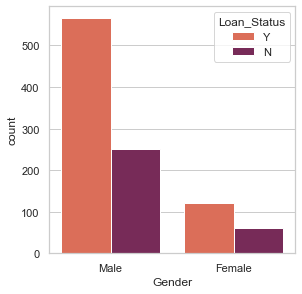

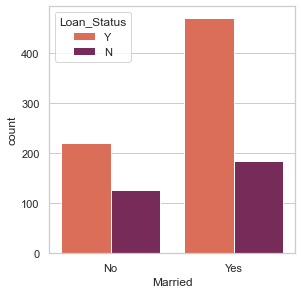

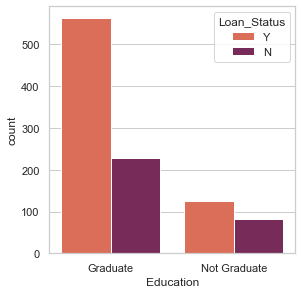

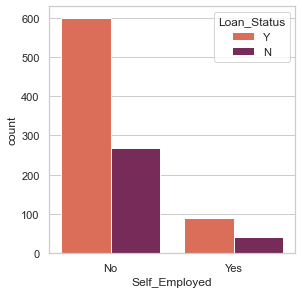

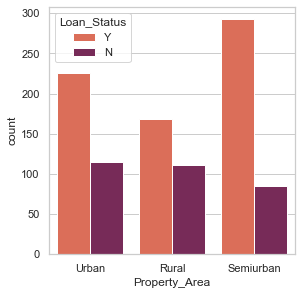

In [255]:
# graphs  the number in each category and if the loan was approved or denied. 
for i in categories[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2, 3, 1)
    sns.countplot(x = i, hue='Loan_Status', data=train_df, palette='rocket_r')

In [256]:
# converting all categories to numeric for heatmap 

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# new values to database
train_df = train_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [257]:
# convert dependents column
Dependents_ = pd.to_numeric(train_df.Dependents)

#drop prior 
train_df.drop(['Dependents'], axis = 1, inplace = True)

# concat new dependents into database 
train_df = pd.concat([train_df, Dependents_], axis = 1)

# checking for validation 
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               999 non-null    int64  
 1   Married              999 non-null    int64  
 2   Education            999 non-null    int64  
 3   Self_Employed        999 non-null    int64  
 4   Applicant_Income     999 non-null    int64  
 5   Co_Applicant_Income  999 non-null    float64
 6   Loan_Amount          999 non-null    float64
 7   Loan_Amount_Term     999 non-null    float64
 8   Credit_History       999 non-null    float64
 9   Property_Area        999 non-null    int64  
 10  Loan_Status          999 non-null    int64  
 11  Dependents           999 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 93.8 KB


<AxesSubplot:>

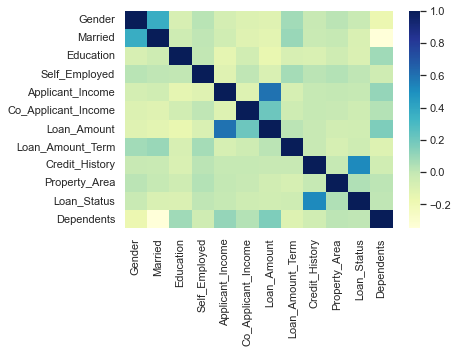

In [258]:
# plot heatmap 
sns.heatmap(train_df.corr(), cmap='YlGnBu')


In [260]:
# correlation table 

c = train_df.corr()

c.style.background_gradient(cmap='YlGnBu')

,Gender,Married,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364982,-0.081335,0.022018,-0.066503,-0.103875,-0.116030,0.076894,-0.013971,0.016122,-0.018714,-0.173074
Married,0.364982,1.000000,-0.039935,0.008547,-0.052821,-0.113435,-0.136809,0.096254,-0.019537,-0.008369,-0.087628,-0.349428
Education,-0.081335,-0.039935,1.000000,0.001055,-0.141019,-0.054796,-0.160076,-0.084283,-0.088795,-0.045997,-0.093655,0.082276
Self_Employed,0.022018,0.008547,0.001055,1.000000,-0.117022,0.009014,-0.090611,0.068104,0.016363,0.030178,0.007802,-0.044616
Applicant_Income,-0.066503,-0.052821,-0.141019,-0.117022,1.000000,-0.111058,0.594581,-0.077772,-0.011946,-0.005223,-0.008066,0.104796
Co_Applicant_Income,-0.103875,-0.113435,-0.054796,0.009014,-0.111058,1.000000,0.205203,-0.041713,-0.008682,-0.016392,-0.040929,0.033763
Loan_Amount,-0.116030,-0.136809,-0.160076,-0.090611,0.594581,0.205203,1.000000,0.019508,-0.017298,-0.056465,-0.051823,0.158441
Loan_Amount_Term,0.076894,0.096254,-0.084283,0.068104,-0.077772,-0.041713,0.019508,1.000000,-0.012732,-0.078242,-0.043328,-0.107943
Credit_History,-0.013971,-0.019537,-0.088795,0.016363,-0.011946,-0.008682,-0.017298,-0.012732,1.000000,-0.009498,0.520274,-0.049059
Property_Area,0.016122,-0.008369,-0.045997,0.030178,-0.005223,-0.016392,-0.056465,-0.078242,-0.009498,1.000000,0.041226,0.009317


# Machine Learning Models 

In [261]:
train_df.to_csv('Desktop/numeric_data.csv')

In [348]:


new_train_df = pd.read_csv('Desktop/numeric_data.csv')

new_y = new_train_df.values[:, 11]

new_X = new_train_df.values[:, 1:11]

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=0)

dt_clf_gini = DecisionTreeClassifier(criterion="gini",
                                     random_state=0,
                                     max_depth=15,
                                     min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)

print("Decision Tree using Gini Index\nAccuracy is ",
      accuracy_score(y_test, y_pred_gini) * 100)

Decision Tree using Gini Index
Accuracy is  92.34016887816647
